## Exploration 2-1 
### 와인 분류 문제




## 1. 문제 정의 

#####  sklearn.datasets의 wine 데이터를 사용해 클래스 0,1,2 를 분류 하는 예측모델구축

In [128]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
wine_db= load_wine()

In [8]:
print("와인 데이터 셋의 키: \n{}".format(wine_db.keys()))

wine 데이터 셋의 키: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [219]:
print(wine_db.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [12]:
# 실제 데이터는 data 필드에 저장되어 있음
wine_data = wine_db.data

In [13]:
# target 값은 우리가 예측하려는 와인 종류 클래스 번호(0, 1, 2)를 가지고 있다.
wine_target = wine_db.target

In [14]:
# feature_names 값은 각 특성을 설명하는 문자열 리스트이다.
feature_names = wine_db.feature_names

In [17]:
# wine_df라는 데이터 프레임을 생성한다.
wine_df = pd.DataFrame(wine_data, columns=feature_names)

In [18]:
# 실제 정답 값을 데이터프레임에 저장 
wine_df['label'] = wine_target

In [19]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 2. 데이터 시각화 (EDA)

1. 결측값 확인 
2. 데이터 분포 확인
3. 이상치 탐지
4. 데이터 불균형
5. 상관관계 확인

### 2.1 결측값 확인
wine_df.info()를 실행해 정보를 확인했을 때 모두 float64 숫자형 데이터이고, 결측값은 없다

In [20]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

#### 2.2 데이터 분포
#### 단변량(Univariate) 데이터 시각화
특성들의 분포를 히스토그램을 통해 어떤 분포를 가지는지 시각적으로 확인 할 수 있다.

malic_acid, flavanoids와 같은 특성은 정규분포를 따르지 않고 특성값의 범위가 일정하지 않으므로 스케일링이 필요할 수 있다.

In [226]:
color_list = ['#1abc9c','#2ecc71','#3498db','#9b59b6','#34495e',
             '#16a085','#27ae60','#e67e22','#e74c3c','#2c3e50',
              '#f39c12','#c0392b','#95a5a6']

def sns_histplot(feature_names, color_list, i, j):
    plt.figure(figsize=(20,20))
    idx = 1
    for feature, color in zip(feature_names, color_list):
        if idx <= (i * j):
            plt.subplot(i, j, idx)
            sns.histplot(wine_df[feature], color=color, kde=True).set_title("{} Interval and Counts".format(feature))
            idx += 1
        else:
            break

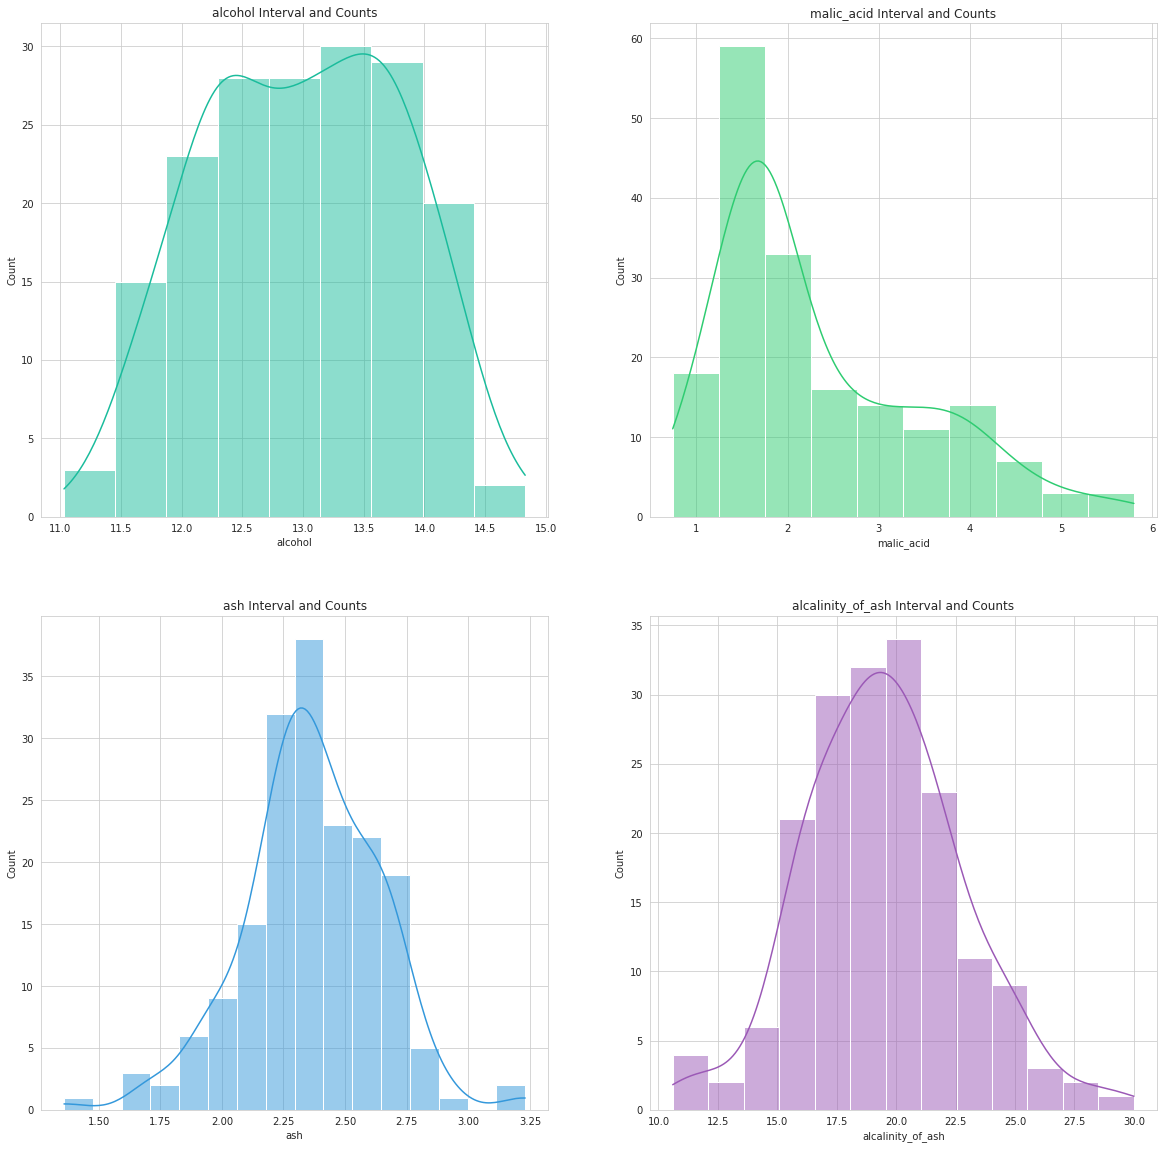

In [228]:
sns_histplot(feature_names[:4], color_list[:4],2,2)

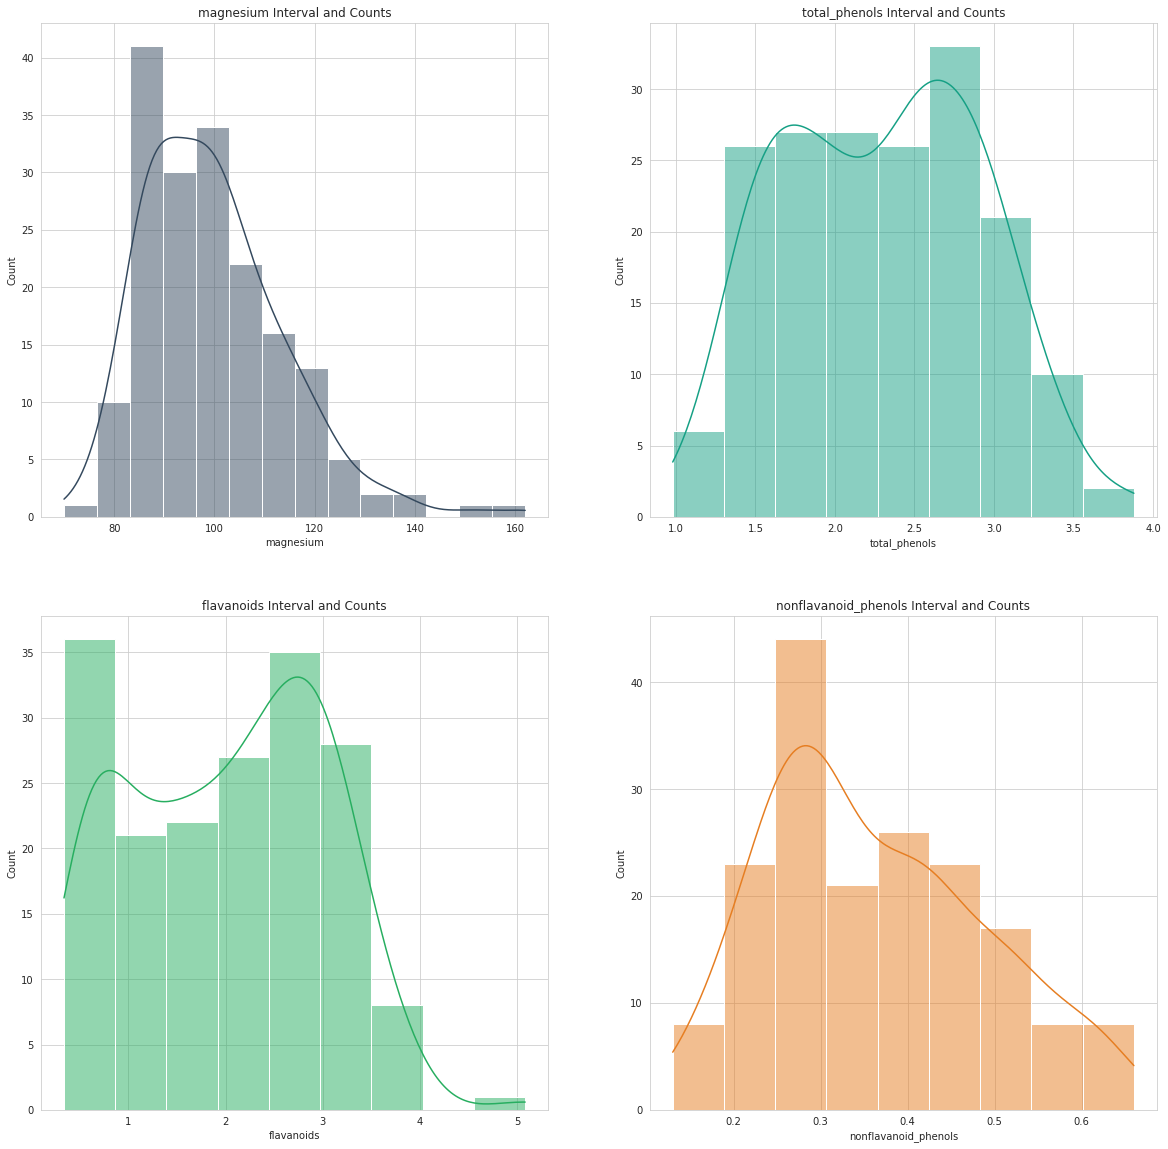

In [230]:
sns_histplot(feature_names[4:8], color_list[4:8],2,2)

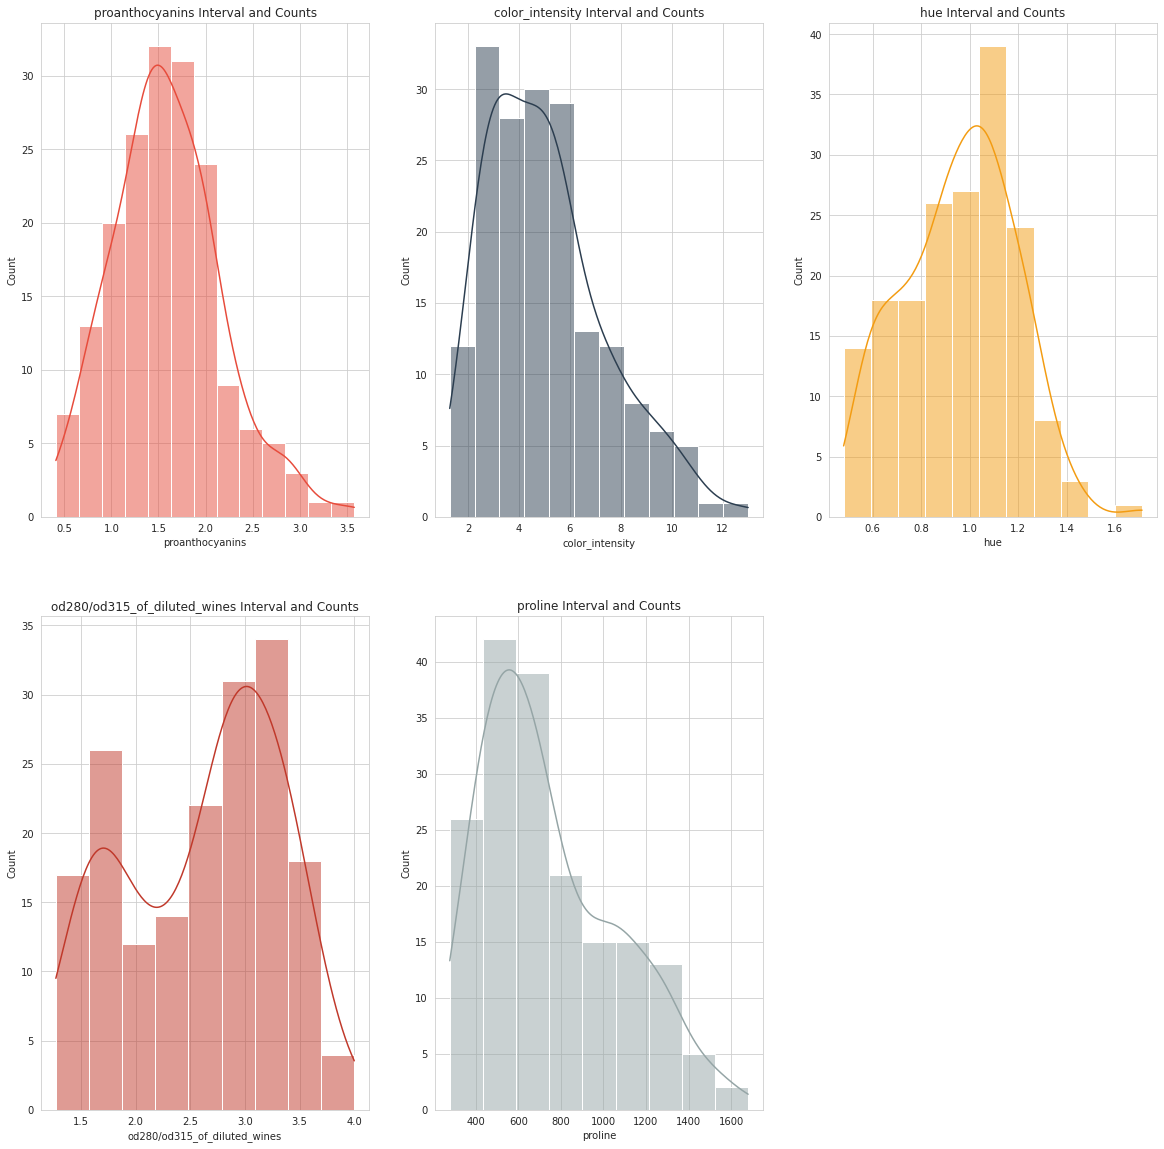

In [231]:
sns_histplot(feature_names[8:], color_list[8:],2,3)

In [300]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### 2.3 이상치 탐지
#### box-plot을 이용해 특성값에 존재하는 이상치 존재 여부를 확인 할 수 있다.

'malic_acid',  'ash',  'alcalinity_of_ash',  'magnesium', 'proanthocyanins', 'color_intensity', 

'hue' 등의 특성에서 이상값이 나타나므로 StandardScaler보다는 RobustScaler를 사용하기로 판단했다.

```
1	StandardScaler	기본 스케일. 평균과 표준편차 사용
2	MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 스케일링
3	MaxAbsScaler	최대절대값과 0이 각각 1, 0이 되도록 스케일링
4	RobustScaler	중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
```

/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


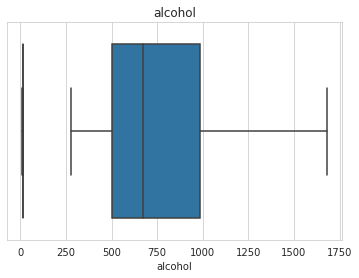

/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


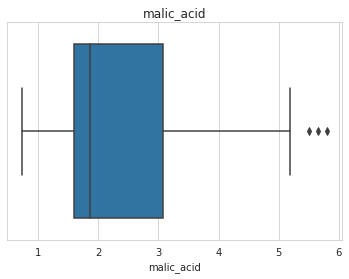

/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


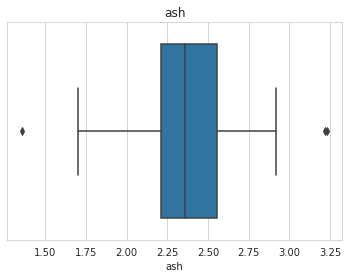

/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


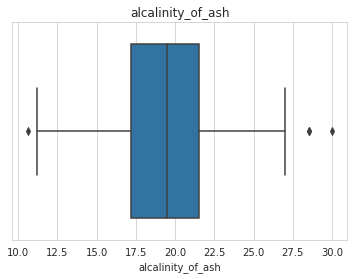

/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


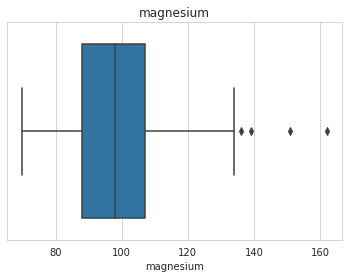

/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


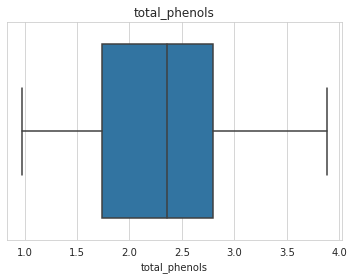

/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


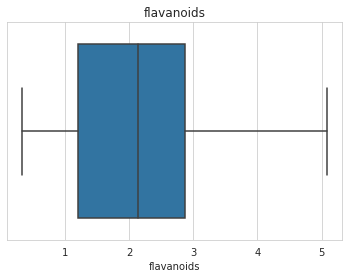

/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


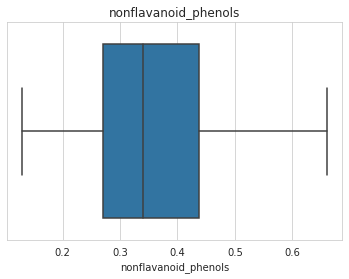

/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


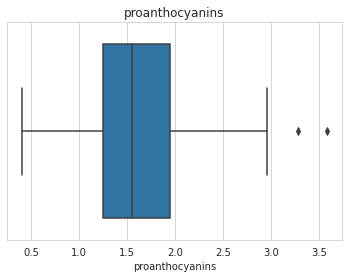

/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


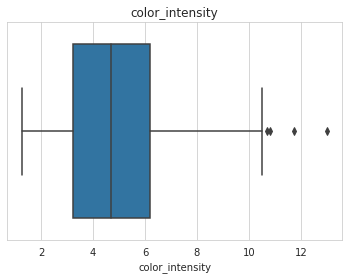

/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


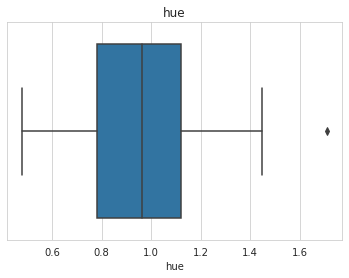

/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


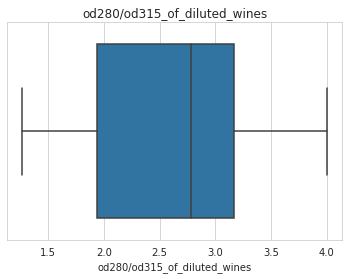

/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


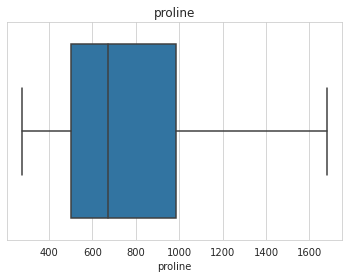

In [306]:
for feature in feature_names:
    sns.boxplot(x = feature, orient = "v", data = wine_df)
    plt.title(feature)
    plt.show()

### 2.4 데이터 불균형
#### label의 클래스 분포가 어떻게 되는가?
```
만약 데이터 분포가 balance 하지 않다면 모델을 평가할 때 판단 기준을 다르게 세워야 할 수 있다.
와인 데이터의 클래스 분포는 '0': 33.1%, '1': 39.9%, '2': 27%로 대체적으로 비슷하므로 불균형은 아니기
때문에 accuracy로 모델의 성능을 판단해도 괜찮을 것 같다.
```

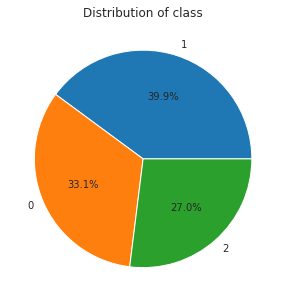

In [310]:
plt.figure(1, figsize=(5,5))
plt.title("Distribution of class")
plt.ylabel("class")
wine_df['label'].value_counts().plot.pie(autopct="%1.1f%%").set_ylabel('')

plt.show()

### 2.5 상관 관계 확인
#### 히트맵을 그려서 특성간의 상관 관계가 존재 하는지 알아보자 
```
변수간의 상관관계는 -1 ~ 1 값의 범위를 가지는데 독립 변수간 상관 관계를 보이는 것을 다중공선성(Multicollinearity)이라 하고 변수간의 상관관계가 존재한다면 총 분산에서 설명력(분산)이 높은 몇개의 특성을 선택하여도 데이터를 충분히 설명할 수 있기 때문에 feature_selection의 필요성이 높아진다. 
그래서 PCA를 적용하기로 결정하였다.
```

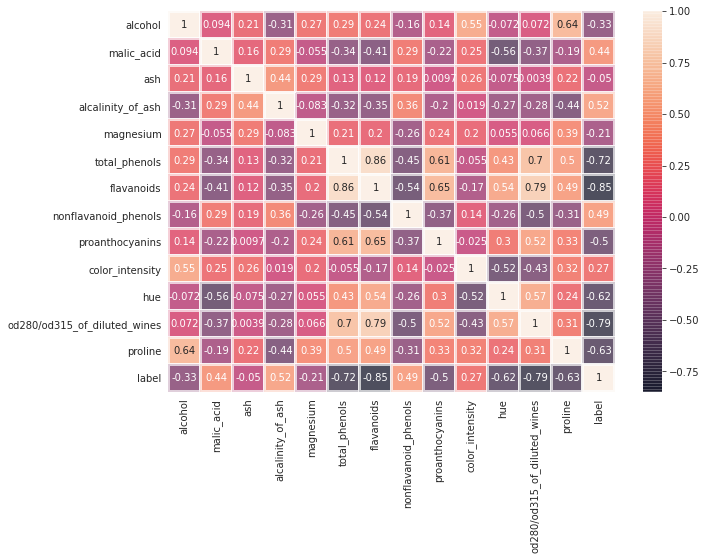

In [232]:
plt.figure(figsize=(10,7))
sns.heatmap(wine_df.corr(), annot=True, cmap='rocket', alpha=0.7,linewidths = 2)
plt.show()

## 3. 데이터 준비 및 모델링 

```
1. train_test_split
2. Pipeline 1차(전처리 없이)
3. 결과해석
```

#### 3-1. 훈련 / 테스트 데이터 준비

```
1. 178개의 적은 데이터 셋을 비율을 나눠서 훈련/테스트 세트로 맞춰야한다.
데이터 수가 적기 때문에 accuracy가 높더라도 모델의 일반화 성능을 장담할 수 없다.

2. 적은 데이터를 활용해서 무작정 모델을 평가하기 보다는 K-겹 교차검증 방법과 같이 
샘플의 이용을 극대화하는 방법을 생각해보자

이 부분에 대해서 개념을 정리해야할 필요성을 느꼈고
노션에 '다양한 모델 평가 방법' 이라는 주제로 글을 작성하였다.

```

https://www.notion.so/modulabs/871bacf4ceb1459dae03b3376cb52435

In [312]:
from sklearn.model_selection import train_test_split

X = wine_df.drop('label', axis=1)
y = wine_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=7)

In [313]:
print("X_train의 크기: {}".format(X_train.shape))
print("y_train의 크기: {}".format(X_train.shape))

X_train의 크기: (142, 13)
y_train의 크기: (142, 13)


In [314]:
print("X_test의 크기: {}".format(X_test.shape))
print("y_test의 크기: {}".format(y_test.shape))

X_test의 크기: (36, 13)
y_test의 크기: (36,)


## 3.2 Pipeline - 1차
```
다양한 모델을 구축하기 위해 Pipeline을 사용하였다.
아까 EDA 부분에서 언급했던 것 처럼 Scaling, feature_selection의 필요성을 느꼈기 때문에
모델의 default 성능을 확인 해보고 이후에 Scaling, feature_selection을 위해 파이프라인을 재구축한다.
```

In [265]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.linear_model import SGDClassifier as sgd
from sklearn.svm import SVC as svm
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [276]:
models = {
    'DecisionTree': dt(),
    'RandomForest': rf(),
    'SVM': svm(),
    'SGD': sgd(),
    'Logistic Regression': lr()
}

In [277]:
pipeline_dt = Pipeline([('dt_classifier', dt())])
pipeline_rf = Pipeline([('rf_classifier', rf())])
pipeline_svm = Pipeline([('svm_classifier', svm())])
pipeline_sgd = Pipeline([('sgd_classifier', sgd())])
pipeline_lr = Pipeline([('lr_classifier', lr())])

In [278]:
pipelines = [
    pipeline_dt,
    pipeline_rf,
    pipeline_svm,
    pipeline_sgd,
    pipeline_lr
]

In [279]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [280]:
model_list = list(models.keys())
test_scores = []

for i, model in enumerate(pipelines):
    score = model.score(X_test, y_test)
    score = int(round(score, 2) * 100)
    test_scores.append(score)
    print("{} Test Accuracy: {}%".format(model_list[i], test_scores[i]))

DecisionTree Test Accuracy: 92%
RandomForest Test Accuracy: 100%
SVM Test Accuracy: 61%
SGD Test Accuracy: 61%
Logistic Regression Test Accuracy: 97%


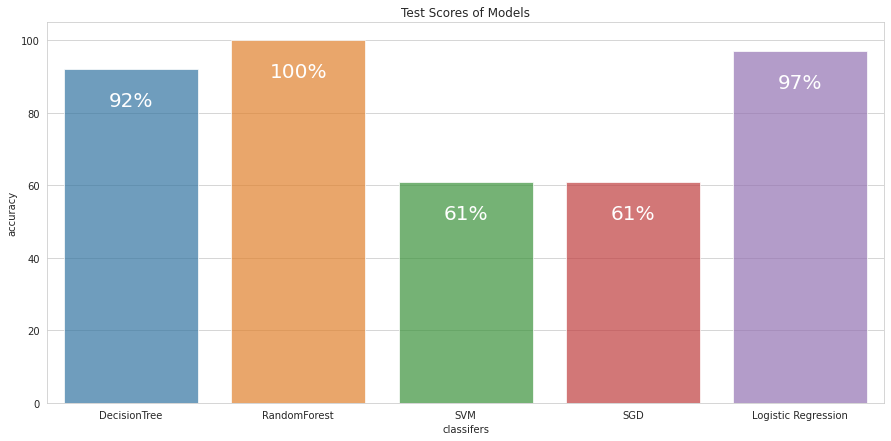

In [281]:
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
plt.title('Test Scores of Models')

ax1 = sns.barplot(x=model_list, y=test_scores, alpha=0.7)
for p in ax1.patches:
    ax1.annotate(f'\n{int(p.get_height())}%', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=20)
    
plt.xlabel('classifers')
plt.ylabel('accuracy')
plt.show()

In [282]:
from sklearn.metrics import classification_report

for pipe in pipelines:
    print("---------------------------------------------------------")    
    predictions = pipe.predict(X_test)
    print('classifier : {}\n'.format(pipe[0]))
    print("classification Report: \n{}\n".format(classification_report(predictions, y_test)))

---------------------------------------------------------
classifier : DecisionTreeClassifier()

classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.94      0.94      0.94        17
           2       0.83      1.00      0.91        10

    accuracy                           0.92        36
   macro avg       0.92      0.91      0.91        36
weighted avg       0.93      0.92      0.92        36


---------------------------------------------------------
classifier : RandomForestClassifier()

classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00       

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.3 결과 해석

```
RandomForestClassifier()와 LogisticRegression(), DecisionTreeClassifier() 이 성능이 높게 나왔는데 비선형 분류기인 3개의 모델은 
높은 성능을 보이지만 선형 분류기인 SVC와 SGD의 경우 고차원 데이터의 경우 일반적으로 트리 모델의 성능이 좋지만 선형 분류기로는 고차원의 데이터의 분류 성능을 기대하기 어렵기 때문에 차원 축소를 통해 선형 분류기의 성능을 높일 필요가 있다.
```

## 4. 데이터 전처리와 Pipeline - 2차

```
1. Pipeline 2차
2. 결과 해석
3. 시각화
```

In [329]:
from sklearn.preprocessing import RobustScaler

pipeline_dt = Pipeline([('scaler1', RobustScaler()),
                        ('dt_classifier', dt())])
pipeline_rf = Pipeline([('scaler2', RobustScaler()),
                         ('rf_classifier', rf())])
pipeline_sgd = Pipeline([('scaler3', RobustScaler()),
                         ('sgd_classifier', sgd())])
pipeline_lr = Pipeline([('scaler4', RobustScaler()),
                         ('lr_classifier', lr())])

In [330]:
pipelines = [
    pipeline_dt,
    pipeline_rf,
    pipeline_sgd,
    pipeline_lr
]

In [ ]:
for pipe in pipelines:
    
    print("classifier : {}".format(pipe[1]))
 
    selection = SelectFromModel(pipe[1], prefit=True) #feature_selection
    select_X_train = selection.transform(X_train)
        
    # 모델 훈련
    selection_model = pipe
    selection_model.fit(select_X_train, y_train)

    print("------------------------------------------------")
    print(f"기존 X_train shape: {X_train.shape} 축소된 X_train shape: {select_X_train.shape}")
    print("\n")
    
    # 모델 평가
    select_X_test = selection.transform(X_test, prefit=True)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))

In [343]:
model_list = list(models.keys())
test_scores = []

for i, model in enumerate(pipelines):
    score = model.score(X_test, y_test)
    score = int(round(score, 2) * 100)
    test_scores.append(score)
    print("{} Test Accuracy: {}%".format(model_list[i], test_scores[i]))

DecisionTree Test Accuracy: 94%
RandomForest Test Accuracy: 100%
SVM Test Accuracy: 94%
SGD Test Accuracy: 97%


In [ ]:
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
plt.title('Test Scores of Models')

ax1 = sns.barplot(x=model_list, y=test_scores, alpha=0.7)
for p in ax1.patches:
    ax1.annotate(f'\n{int(p.get_height())}%', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=20)
    
plt.xlabel('classifers')
plt.ylabel('accuracy')
plt.show()